# Explore samples, classified data characters

## Analyse perfect Water/NonWater pixels characteristics

In [1]:
import os, sys

import numpy as np

from numpy import genfromtxt

import pandas as pd
#import pandas.io.data
from pandas_datareader import data, wb
from pandas import DataFrame



%matplotlib inline
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10 # increase plot size a bit...
rcParams['axes.formatter.useoffset'] = False  # disable scalar formatter / offset in axes labels

In [2]:
# To run a python script, use run path2/script.py

# run ../python/apply_detree.py /g/data/u46/fxz547/wofs_training_sample_data/orig_copy/Test_Tile_samples_20140203.csv


In [3]:
# import your own modules by providing path
sys.path.append('../python')

In [4]:
import apply_detree

#import imp; imp.reload(apply_detree)  # force the interpreter to re-import if apply_detree.py changed

In [5]:
!ls /g/data/u46/fxz547/wofs_training_sample_data/
#my_file_csv='/g/data/u46/fxz547/wofs_training_sample_data/orig_copy/Test_Tile_samples_20140203.csv'
my_file_csv='/g/data/u46/fxz547/wofs_training_sample_data/all_samples.csv'

all_samples.csv  orig_copy


In [6]:
pdf = apply_detree.get_pdf_from_csv(my_file_csv)
# todo: keep the old class_label. how to add a new_class column?

/g/data/u46/fxz547/anaconda2/lib/python2.7/site-packages/pandas/core/indexing.py:284: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/g/data/u46/fxz547/anaconda2/lib/python2.7/site-packages/pandas/core/indexing.py:461: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [7]:
pdf.head()

,Bright,Class_name,Mean_PQMas,Mean_tm1c,Mean_tm2c,Mean_tm3c,Mean_tm4c,Mean_tm5c,Mean_tm7c,NDI_43,NDI_52,NDI_54,NDI_72,NDI_74,Scene_Name,X_Min_Pxl,Y_Min_Pxl,Class2
0,449.333333,CloudShadow_Bare,16383.0,360.0,491.0,497.0,822.0,946.0,562.0,0.246399,0.316632,0.070136,0.067426,-0.187861,115_-032_2011-01-02T01-55-10.679038,3614.0,2082.0,NoWater
1,461.333333,CloudShadow_Bare,16383.0,377.0,459.0,548.0,856.0,1060.0,594.0,0.219373,0.395655,0.106472,0.128205,-0.180690,115_-032_2011-01-02T01-55-10.679038,3611.0,2070.0,NoWater
2,521.666667,CloudShadow_Bare,16383.0,410.0,555.0,600.0,890.0,1014.0,690.0,0.194631,0.292543,0.065126,0.108434,-0.126582,115_-032_2011-01-02T01-55-10.679038,3610.0,2069.0,NoWater
3,707.333333,CloudShadow_Veg,16383.0,551.0,742.0,829.0,1089.0,1080.0,720.0,0.135558,0.185510,-0.004149,-0.015048,-0.203980,115_-032_2011-01-02T01-55-10.679038,2941.0,1638.0,NoWater
4,685.666667,W_LargeBody,16383.0,408.0,842.0,807.0,1193.0,558.0,242.0,0.193000,-0.202857,-0.362650,-0.553506,-0.662718,115_-032_2011-01-02T01-55-10.679038,3104.0,1109.0,Water


In [8]:
# Group by Pixel Class_name, then count the number of rows in each group
pdf.groupby('Class2').count()

,Bright,Class_name,Mean_PQMas,Mean_tm1c,Mean_tm2c,Mean_tm3c,Mean_tm4c,Mean_tm5c,Mean_tm7c,NDI_43,NDI_52,NDI_54,NDI_72,NDI_74,Scene_Name,X_Min_Pxl,Y_Min_Pxl
Class2,,,,,,,,,,,,,,,,,
NoWater,3989595,3989595,3989595,3989595,3989595,3989595,3989595,3989595,3989595,3989595,3989595,3989595,3989595,3989595,3989595,3989595,3989595
Water,947577,947577,947577,947577,947577,947577,947577,947577,947577,947577,947577,947577,947577,947577,947577,947577,947577


In [9]:
pdf.groupby('Mean_PQMas').count()  # perfect good pixels

,Bright,Class_name,Mean_tm1c,Mean_tm2c,Mean_tm3c,Mean_tm4c,Mean_tm5c,Mean_tm7c,NDI_43,NDI_52,NDI_54,NDI_72,NDI_74,Scene_Name,X_Min_Pxl,Y_Min_Pxl,Class2
Mean_PQMas,,,,,,,,,,,,,,,,,
16383.0,4937172,4937172,4937172,4937172,4937172,4937172,4937172,4937172,4937172,4937172,4937172,4937172,4937172,4937172,4937172,4937172,4937172


In [10]:
#perfect pixel has a quality flag 13683 in the column Mean_PQMa
bin(16383)

'0b11111111111111'

# Separate the Water and NonWater data

In [11]:
dfwater=pdf[pdf['Class2'] =='Water']
dfnowater= pdf[pdf['Class2'] !='Water']

In [12]:
dfwater.shape

(947577, 18)

In [13]:
dfnowater.shape

(3989595, 18)

# Plotting the values

See http://pandas.pydata.org/pandas-docs/stable/visualization.html


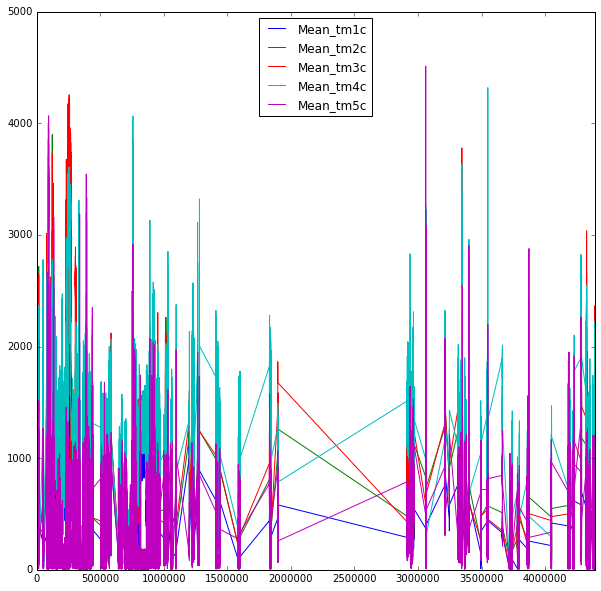

In [14]:
colname= ['Mean_tm1c','Mean_tm2c','Mean_tm3c','Mean_tm4c','Mean_tm5c' ] #'NDI_72' #'NDI_52' # 'Bright'   #'Mean_PQMas' #'NDI_43' #'Mean_tm5c'
plt.figure(); dfwater[colname].plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f55902b9f50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f556383dd50>]], dtype=object)

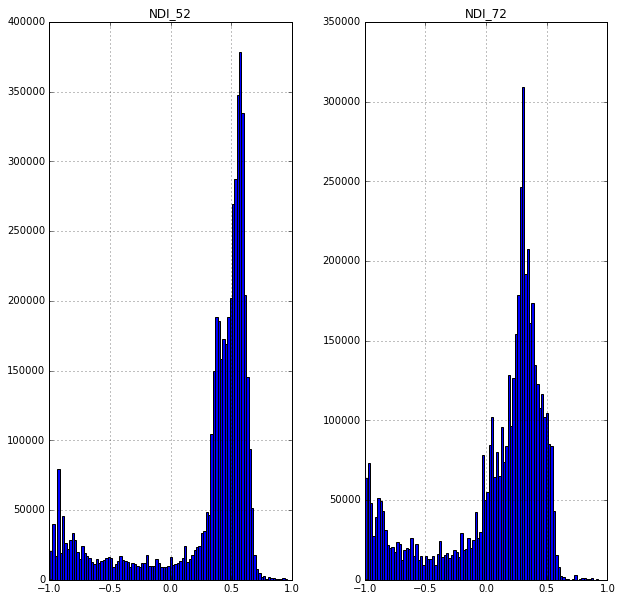

In [17]:
pdf[[clm_list[10],clm_list[12]] ].hist(layout=(1,2),bins=100)  

In [18]:
#get the column names as list
clm_list = []
for column in pdf.columns: clm_list.append(column)
print clm_list[3:14]


['Mean_tm1c', 'Mean_tm2c', 'Mean_tm3c', 'Mean_tm4c', 'Mean_tm5c', 'Mean_tm7c', 'NDI_43', 'NDI_52', 'NDI_54', 'NDI_72', 'NDI_74']


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f55633b6fd0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f556315b250>]], dtype=object)

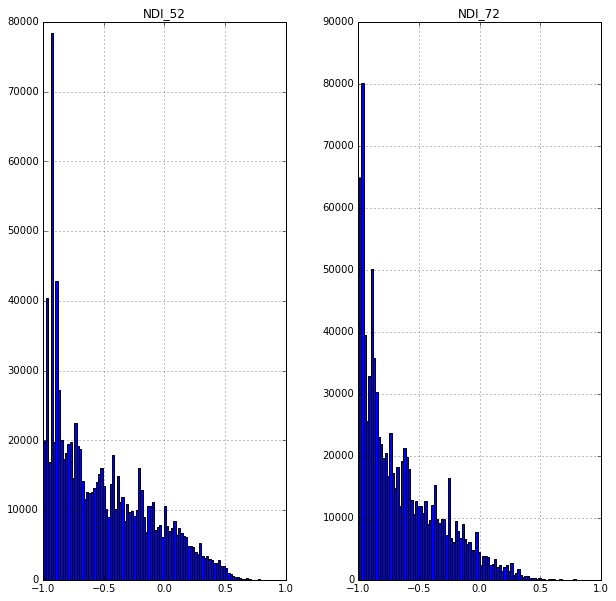

In [19]:
# histogram, distrubution of the variables
dfwater[[clm_list[10],clm_list[12]] ].hist(layout=(1,2),bins=100)  

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f55630fb7d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f5562ae2390>]], dtype=object)

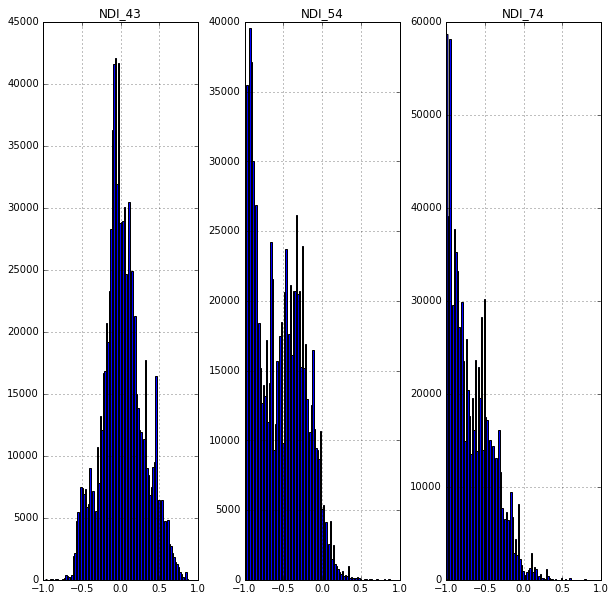

In [20]:
# histogram, distrubution of the ratios feature variables. 
# NDI_43 is close to normal distrib.
# NDI_54 and 74 mostly negative for water
dfwater[[clm_list[9],clm_list[11], clm_list[13] ] ].hist(layout=(1,3),bins=100) 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5562b8fad0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f55622a48d0>]], dtype=object)

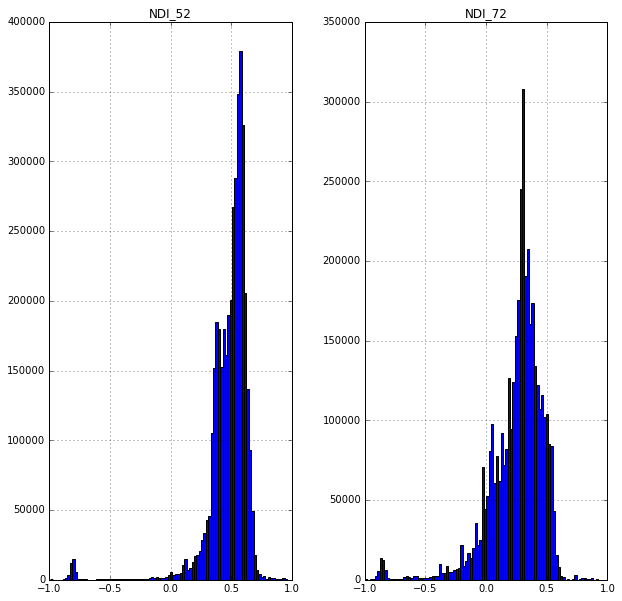

In [21]:
# Compare to Not Water pixels !!!
dfnowater[[clm_list[10],clm_list[12]] ].hist(layout=(1,2),bins=100) 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5562c6e810>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f5561cb1950>]], dtype=object)

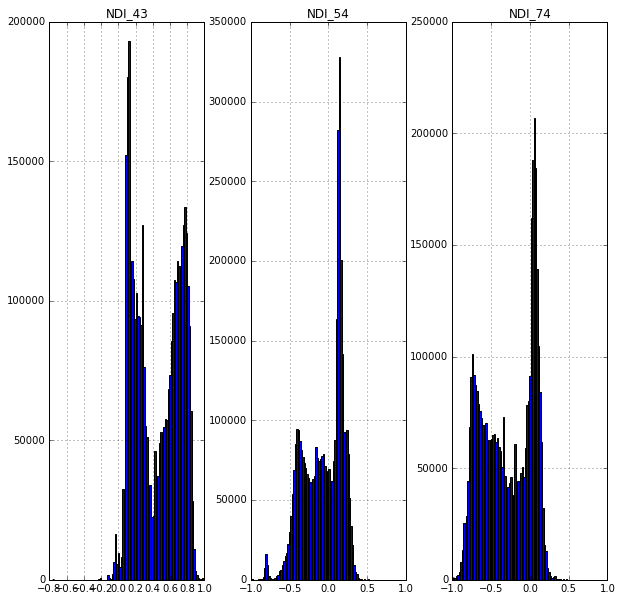

In [22]:
# histogram for nowaterfeature variables distrubution
# NDI_43  poitive
# NDI_54 and 74 for no-water
dfnowater[[clm_list[9],clm_list[11], clm_list[13] ] ].hist(layout=(1,3),bins=100) 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f556153b610>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f5561453890>]], dtype=object)

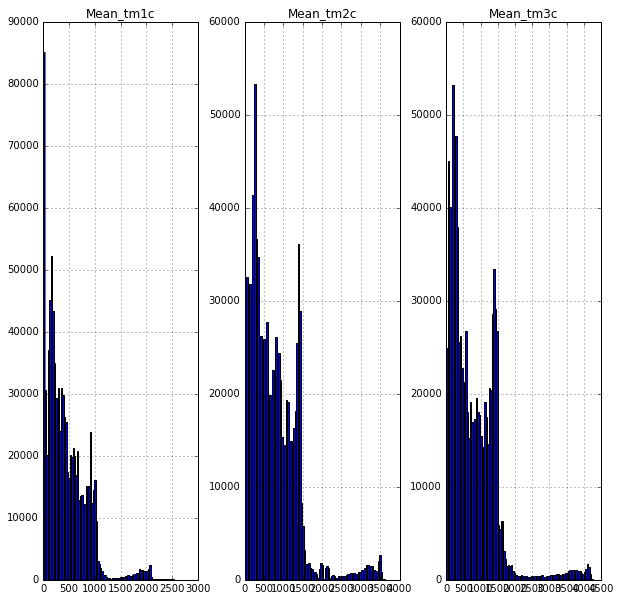

In [23]:
dfwater[[clm_list[3],clm_list[4],clm_list[5]] ].hist(layout=(1,3), bins=100)   # BGR distribution?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f556146c310>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f555c8fbf10>]], dtype=object)

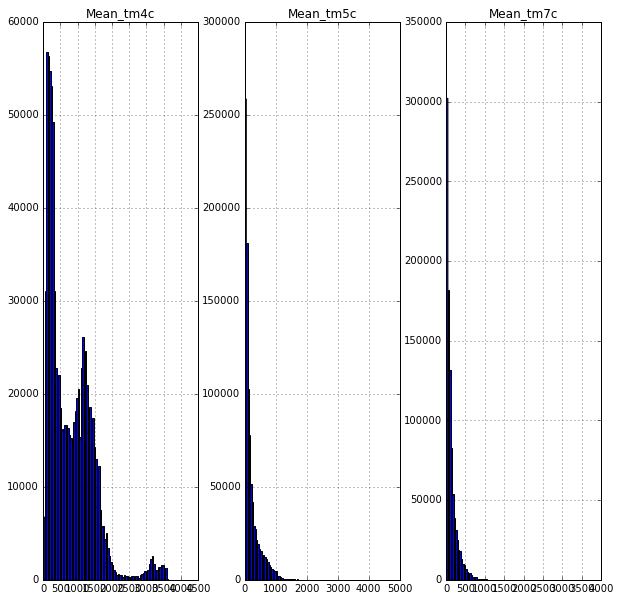

In [24]:
dfwater[[clm_list[6],clm_list[7], clm_list[8] ]].hist(layout=(1,3),bins=100)  # not normal distribution

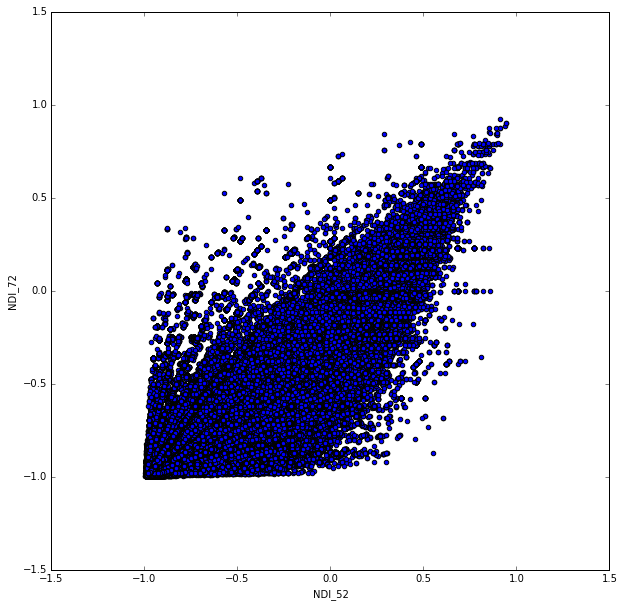

In [ ]:
 dfwater.plot.scatter(x=clm_list[10], y=clm_list[12]);

In [ ]:
dfnowater.plot.scatter(x=clm_list[10], y=clm_list[12]);

In [ ]:
pdf.plot.scatter(x=clm_list[10], y=clm_list[12]);

In [ ]:
from pandas import DataFrame as df
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
 dfnowater['NDI_72'].values

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#notwork c=  pdf['Mean_tm5c'] color must be 2D
#p = ax.scatter(dfwater['NDI_52'], dfwater['NDI_72'], dfwater['Mean_tm5c'], s=40, c=c)
p = ax.scatter(pdf['NDI_52'], pdf['NDI_72'], pdf['Mean_tm5c'], s=40) #, c=c)
 
# Add title and axis labels 
ax.set_xlabel("NDI52")
ax.set_ylabel("NDI72")
ax.set_zlabel("Band5")
 
# add colorbar and show
#NOT WORK fig.colorbar(p)
plt.show()

# See more :
    * https://plot.ly/pandas/histograms/
    

In [ ]:
# import plotly.tools as tls
# tls.set_credentials_file(username='feizhang01', api_key='b5wevd3gkv') #Z.F zerone

In [ ]:
# Learn about API authentication here: https://plot.ly/pandas/getting-started
# Find your api_key here: https://plot.ly/settings/api

stop_here

import plotly.plotly as py
import plotly.graph_objs as go
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/iris.csv')
df.head()

data = []
clusters = []
colors = ['rgb(228,26,28)','rgb(55,126,184)','rgb(77,175,74)']

for i in range(len(df['Name'].unique())):
    name = df['Name'].unique()[i]
    color = colors[i]
    x = df[ df['Name'] == name ]['SepalLength']
    y = df[ df['Name'] == name ]['SepalWidth']
    z = df[ df['Name'] == name ]['PetalLength']
    
    trace = dict(
        name = name,
        x = x, y = y, z = z,
        type = "scatter3d",    
        mode = 'markers',
        marker = dict( size=3, color=color, line=dict(width=0) ) )
    data.append( trace )

layout = dict(
    width=800,
    height=550,
    autosize=False,
    title='Iris dataset',
    scene=dict(
        xaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        yaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        zaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        aspectratio = dict( x=1, y=1, z=0.7 ),
        aspectmode = 'manual'        
    ),
)

fig = dict(data=data, layout=layout)

# IPython notebook
# py.iplot(fig, filename='pandas-3d-iris', validate=False)

url = py.plot(fig, filename='pandas-3d-iris', validate=False)


In [ ]:
# !pip install plotly


# How to design best ML models accordingly?

In [ ]:
# https://www.google.com.au/webhp?sourceid=chrome-instant&ion=1&espv=2&ie=UTF-8#q=how+to+design+Machine+learning+models+according+feature+stats

## Prepare sample dataset for scikit analysis

In [ ]:
print (clm_list[10],clm_list[12], clm_list[7])

In [ ]:
#select the columns values into numpy array
#X = pdf[clm_list[3:14]].values
# select 3 most important features
X= pdf[[clm_list[10],clm_list[12], clm_list[7]]].values
# Y = pdf[clm_list[1]].values
Y = pdf[clm_list[-1]].values  # the new column Class2
       
print X.shape, type(X)
print Y.shape

## Hello Scikit-learn

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=7)

In [ ]:
# Traing the model with the sample data %time clf = clf.fit(X, Y)

clf = clf.fit(X, Y)

In [ ]:
# verify the model using function predict
isample= 227014
# Or get a random sample to compare
#isample=np.random.random_integers(0,999)

print (isample, clf.predict(X[isample,:].reshape(1, -1) ), Y[isample], pdf.Class_name.iloc[isample])

In [ ]:
#3) Apply / evaluate
clf.score(X,Y)

In [ ]:
# Advanced_sklearn/Chapter%201/Classification.ipynb
# more methods, split the samples , validation 
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y)

In [ ]:
print X_test.shape
clf.score(X_test,y_test)


In [ ]:
# Let's Generate the Tree.

from IPython.display import Image 
from sklearn.externals.six import StringIO  
import pydot 
with open("de_tree.dot", 'w') as f: f = tree.export_graphviz(clf, out_file=f)

    
# dot -Tpdf iris.dot -o iris.pdf

!dot -Tpdf de_tree.dot -o de_tree.pdf

In [ ]:
# Todo: show Tree in this notebook
# http://scikit-learn.org/stable/modules/tree.html
dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=[clm_list[10],clm_list[12], clm_list[7]],  
                         class_names=Y[:],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

# Google search how to select important feature

** http://machinelearningmastery.com/an-introduction-to-feature-selection/

** http://scikit-learn.org/stable/modules/feature_selection.html
    

# you can pickle the clf tree for later use.

In [ ]:
# http://scikit-learn.org/stable/modules/model_persistence.html

# http://stackoverflow.com/questions/15564410/scikit-learn-svm-how-to-save-load-support-vectors
# 
# show tree

clf.tree_.__getstate__()['nodes']

# Let's Try some other methods

In [ ]:
from sklearn.svm import LinearSVC
svm = LinearSVC(C=0.1)
svm.fit(X_train, y_train)


In [ ]:
print(svm.predict(X_train))
print(y_train)

In [ ]:
svm.score(X_train, y_train)

In [ ]:
svm.score(X_test, y_test)

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=50)
rf.fit(X_train, y_train)

In [ ]:
rf.predict(X_test)

In [ ]:
rf.score(X_test, y_test)

In [ ]:
Stop here. Do acuracy comparison:
    
Random Forest 99.310%  Train slow
LinearSVM 90.799%
DecisionTree(depth=7) 96.756%  Train very fast. Complex tree

# Cross Validation
Advanced_sklearn/Chapter%201/Cross%20Validation.ipynb

In [ ]:
from sklearn.cross_validation import cross_val_score
for classifier in [clf, svm, rf]:
    scores = cross_val_score(classifier, X, Y, cv=5)
    print(scores)
    print(np.mean(scores))

# Results with my_file_csv='/g/data/u46/fxz547/wofs_training_sample_data/orig_copy/Test_Tile_samples_20140203.csv'
# random forest is no better than clf. svm is no good.
# [ 0.93761947  0.9168854   0.93080083  0.96054265  0.97094193]
# cls:  0.943358053934
# [ 0.84295027  0.93209894  0.90567316  0.90808262  0.90809689]
# svm:  0.899380377677
# [ 0.92633591  0.91465293  0.94864626  0.94893796  0.97848818]
# rf: 0.943412249083

In [ ]:
!ls -ltr

# PCA analysis

In [ ]:
#sample function

def sample_PCA():
    """
    Code source: Gaël Varoquaux. License: BSD 3 clause
    """
    
    import numpy as np
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D


    from sklearn import decomposition
    from sklearn import datasets

    np.random.seed(5)

    centers = [[1, 1], [-1, -1], [1, -1]]
    iris = datasets.load_iris()
    X = iris.data
    y = iris.target

    fig = plt.figure(1, figsize=(4, 3))
    plt.clf()
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

    plt.cla()
    pca = decomposition.PCA(n_components=3)
    pca.fit(X)
    X = pca.transform(X)

    for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
        ax.text3D(X[y == label, 0].mean(),
                  X[y == label, 1].mean() + 1.5,
                  X[y == label, 2].mean(), name,
                  horizontalalignment='center',
                  bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
    # Reorder the labels to have colors matching the cluster results
    y = np.choose(y, [1, 2, 0]).astype(np.float)
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.spectral)

    x_surf = [X[:, 0].min(), X[:, 0].max(),
              X[:, 0].min(), X[:, 0].max()]
    y_surf = [X[:, 0].max(), X[:, 0].max(),
              X[:, 0].min(), X[:, 0].min()]
    x_surf = np.array(x_surf)
    y_surf = np.array(y_surf)
    v0 = pca.transform(pca.components_[[0]])
    v0 /= v0[-1]
    v1 = pca.transform(pca.components_[[1]])
    v1 /= v1[-1]

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])

    plt.show()


In [ ]:
sample_PCA()

In [ ]:
print (X.shape)

In [ ]:
# See wofs/Zlocaltest/water_pixels_classification_1.ipynb

#http://stackoverflow.com/questions/27699545/scikit-learn-pca

from sklearn.decomposition import PCA

from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

fig = plt.figure(1, figsize=(4, 3))
plt.clf()


pca = PCA(n_components=3)
pca.fit(X)
pca_score = pca.explained_variance_ratio_   #Eigenvalues (normalized)
V = pca.components_   #Eigenvectors

print (pca_score)

print (V)

print(pca.get_covariance()) #Covariance Matrix
# x_pca_axis, y_pca_axis, z_pca_axis = V.T * pca_score / pca_score.min()

# x_pca_axis, y_pca_axis, z_pca_axis = 3 * V.T
# x_pca_plane = np.r_[x_pca_axis[:2], - x_pca_axis[1::-1]]
# y_pca_plane = np.r_[y_pca_axis[:2], - y_pca_axis[1::-1]]
# z_pca_plane = np.r_[z_pca_axis[:2], - z_pca_axis[1::-1]]
# x_pca_plane.shape = (2, 2)
# y_pca_plane.shape = (2, 2)
# z_pca_plane.shape = (2, 2)
    
# ax.plot_surface(x_pca_plane, y_pca_plane, z_pca_plane)
# ax.w_xaxis.set_ticklabels([])
# ax.w_yaxis.set_ticklabels([])
# ax.w_zaxis.set_ticklabels([])

plt.plot(pca_score, )

plt.show()


In [ ]:
def classify_pixel(images, float64=False):
    """ 
    Implement the decision tree of Norman Mueller et al, to clssify a pixel with 6-bands input.
    Produce a water classification image from the supplied images (6 bands of an NBAR, multiband Landsat image)
    This method evaluates N.Mueller's 7-depth decision tree as follows:


                    -----------------------------N1---------------------------------
                    |                                                              |
                    |                                                              |
                 ---N2-----                                           -------------N21---------------------
                 |        |                                           |                                   |
                 |        |                                           |                                   |
       ----------N4----   N3                                    ------N22---                           ---N35-------
       |              |                                         |          |                           |           |
       |              |                                         |          |                           |           |
    ---N5---       ---N8--------------                       ---N24----    N23                      ---N37------   N36
    |      |       |                 |                       |        |                             |          |
    |      |       |                 |                       |        |                             |          |
    N6     N7   ---N12------------   N9             ---------N26---   N25                        ---N39-----   N38
                |                |                  |             |                              |         |
                |                |                  |             |                              |         |
             ---N16---        ---N13---             N27   --------N28---                   ------N41---    N40
             |       |        |       |                   |            |                   |          |
             |       |        |       |                   |            |                   |          |
             N17  ---N18---   N14     N15              ---N29---    ---N30---           ---N43---     N42
                  |       |                            |       |    |       |           |       |
                  |       |                            |       |    |       |           |       |
                  N19     N20                          N31     N32  N33     N34         N44     N45


:param images:
    A 3D numpy array ordered in (bands,rows,columns), containing the spectral data.
    It is assumed that the spectral bands follow Landsat 5 & 7, Band 1, Band 2, Band 3, Band 4, Band 5, Band 7.

:param float64:
    Boolean keyword. If set to True then the data will be converted to type float64 if not already float64.
    Default is False.

:return:
    A 2D numpy array of type UInt8.  Values will be 0 for No Water, 1 for Unclassified and 128 for water.

:notes:
    The input array will be converted to type float32 if not already float32.
    If images is of type float64, then images datatype will be left as is.

:transcription:
    Transcribed from a Tree diagram output by CART www.salford-systems.com
    Josh Sixsmith; joshua.sixsmith@ga.gov.au

    """

#     logger = logging.getLogger("WaterClasserfier")
#     logger.debug("Started")

    def band_ratio(a,b):
        """
        Calculates a normalised ratio index.
        """
        c = (a - b) / (a + b)
        return c

    dims = images.shape
    if len(dims) == 3:
        bands = dims[0]
        rows  = dims[1]
        cols  = dims[2]
    else:
        rows = dims[0]
        cols = dims[1]

    dtype = images.dtype

    # Check whether to enforce float64 calcs, unless the datatype is already float64
    # Otherwise force float32
    if float64:
        if (dtype != 'float64'):
            images = images.astype('float64')
    else:
        if (dtype == 'float64'):
            # Do nothing, leave as float64
            images = images
        elif (dtype != 'float32'):
            images = images.astype('float32')

    classified = numpy.ones((rows,cols), dtype='uint8')

    NDI_52 = band_ratio(images[4], images[1])
    NDI_43 = band_ratio(images[3], images[2])
    NDI_72 = band_ratio(images[5], images[1])

    b1 = images[0]
    b2 = images[1]
    b3 = images[2]
    b4 = images[3]
    b5 = images[4]
    b7 = images[5]

    # Lets start going down the trees left branch, finishing nodes as needed
    # Lots of result arrays eg r1, r2 etc of type bool are created
    # These could be recycled to save memory, but at the moment they serve to show the tree structure
    # Temporary arrays of type bool (_tmp, _tmp2) are used to combine the boolean decisions
    r1 = NDI_52 <= -0.01

    r2 = b1 <= 2083.5
    classified[r1 & ~r2] = 0 # Node 3

    r3 = b7 <= 323.5
    _tmp = r1 & r2
    _tmp2 = _tmp & r3
    _tmp &= ~r3

    r4 = NDI_43 <= 0.61
    classified[_tmp2 & r4]  = 128 # Node 6
    classified[_tmp2 & ~r4] = 0 # Node 7

    r5 = b1 <= 1400.5
    _tmp2 = _tmp & ~r5
    r6 = NDI_43 <= -0.01
    classified[_tmp2 & r6]  = 128 # Node 10
    classified[_tmp2 & ~r6] = 0 # Node 11

    _tmp &= r5

    r7 = NDI_72 <= -0.23
    _tmp2 = _tmp & ~r7
    r8 = b1 <= 379
    classified[_tmp2 & r8]  = 128 # Node 14
    classified[_tmp2 & ~r8] = 0 # Node 15

    _tmp &= r7

    r9 = NDI_43 <= 0.22
    classified[_tmp & r9] = 128 # Node 17

    _tmp &= ~r9

    r10 = b1 <= 473
    classified[_tmp & r10]  = 128 # Node 19
    classified[_tmp & ~r10] = 0 # Node 20

    # Left branch is completed; cleanup
    #logger.debug("B4 cleanup 1")
    del r2, r3, r4, r5, r6, r7, r8, r9, r10
    gc.collect()
    #logger.debug("cleanup 1 done")

    # Right branch of the tree
    r1 = ~r1

    r11 = NDI_52 <= 0.23
    _tmp = r1 & r11

    r12 = b1 <= 334.5
    _tmp2 = _tmp & ~r12
    classified[_tmp2] = 0 # Node 23

    _tmp &= r12

    r13 = NDI_43 <= 0.54
    _tmp2 = _tmp & ~r13
    classified[_tmp2] = 0 # Node 25

    _tmp &= r13

    r14 = NDI_52 <= 0.12
    _tmp2 = _tmp & r14
    classified[_tmp2] = 128 # Node 27

    _tmp &= ~r14

    r15 = b3 <= 364.5
    _tmp2 = _tmp & r15

    r16 = b1 <= 129.5
    classified[_tmp2 & r16]  = 128 # Node 31
    classified[_tmp2 & ~r16] = 0 # Node 32

    _tmp &= ~r15

    r17 = b1 <= 300.5
    _tmp2 = _tmp & ~r17
    _tmp &= r17
    classified[_tmp]  = 128 # Node 33
    classified[_tmp2] = 0 # Node 34

    _tmp = r1 & ~r11

    r18 = NDI_52 <= 0.34
    classified[_tmp & ~r18] = 0 # Node 36
    _tmp &= r18

    r19 = b1 <= 249.5
    classified[_tmp & ~r19] = 0 # Node 38
    _tmp &= r19

    r20 = NDI_43 <= 0.45
    classified[_tmp & ~r20] = 0 # Node 40
    _tmp &= r20

    r21 = b3 <= 364.5
    classified[_tmp & ~r21] = 0 # Node 42
    _tmp &= r21

    r22 = b1 <= 129.5
    classified[_tmp & r22]  = 128 # Node 44
    classified[_tmp & ~r22] = 0 # Node 45

    #logger.debug("completed")

    return classified


## Select Perfect Pix Data to Analyse 

In [ ]:
perf_pix= pdf[pdf['Mean_PQMas'] == 16383.0]  # where(Mean_PQMas=16383)

# change W_* into Water; all other classes into NotWater. Binary classes
perf_pix.ix[perf_pix.Class_name.str.match('W_*'), 'Class2'] = 'Water'

# change non 'W_*' into NoWater
perf_pix.ix[perf_pix.Class_name.str.match('^W_*')==False, 'Class2'] = 'NoWater'

# Group by Pixel Class_name, then count the number of rows in each group
perf_pix.groupby('Class2').count()

In [ ]:
# Apply a ML algorithm to the pdf type
from sklearn import tree
from IPython.display import Image 
from sklearn.externals.six import StringIO  
import pydot 
    
def apply_ml(pdf):
    #get the column names as list    
    clm_list = []
    for column in pdf.columns: clm_list.append(column)
    print (clm_list[7],clm_list[10],clm_list[12])
    
    #select the columns values into numpy array
    #X = pdf[clm_list[3:14]].values
    # select 3 most important features
    X= pdf[[clm_list[7],clm_list[10],clm_list[12]] ].values
    Y = pdf[clm_list[1]].values

    print X.shape, type(X)
    print Y.shape

    clf = tree.DecisionTreeClassifier(max_depth=5)
    clf= clf.fit(X,Y)
    
    # evaluate the model using function predict
    # isample=123
    # Or get a random sample to compare
    isample=np.random.random_integers(0,999)

    print (isample, clf.predict(X[isample,:].reshape(1, -1) ), Y[isample])

    dot_filename="de_tree.dot"
    with open(dot_filename, 'w') as f: f = tree.export_graphviz(clf, out_file=f)

    
    # !dot -Tpdf de_tree.dot -o de_tree.pdf
    return  dot_filename

In [ ]:
apply_ml(perf_pix)

!dot -Tpdf de_tree.dot -o de_tree.pdf